In [1]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns

# Carregando predições

In [2]:
PRED_PATH = "/home/kenzosaki/mestrado/data/VICTOR/bertimbau_preds.csv"

In [3]:
preds_df = pd.read_csv(PRED_PATH)

In [4]:
print(classification_report(preds_df["document_type"], preds_df["prediction"]))

                                  precision    recall  f1-score   support

          acordao_de_2_instancia       0.86      0.86      0.86       273
agravo_em_recurso_extraordinario       0.62      0.52      0.56      1837
     despacho_de_admissibilidade       0.71      0.58      0.64       198
                          outros       0.97      0.98      0.97     85394
                   peticao_do_RE       0.81      0.72      0.76      6331
                        sentenca       0.95      0.65      0.77      1475

                        accuracy                           0.95     95508
                       macro avg       0.82      0.72      0.76     95508
                    weighted avg       0.95      0.95      0.95     95508



# Gerando a matriz de confusão para as predições

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
%matplotlib inline

In [6]:
label_encoder = LabelEncoder()
preds_df["document_type"] = label_encoder.fit_transform(preds_df["document_type"])
preds_df["prediction"] = label_encoder.fit_transform(preds_df["prediction"])

In [7]:
c_matrix = confusion_matrix(preds_df["document_type"], preds_df["prediction"], normalize="true")

In [8]:
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=label_encoder.classes_)

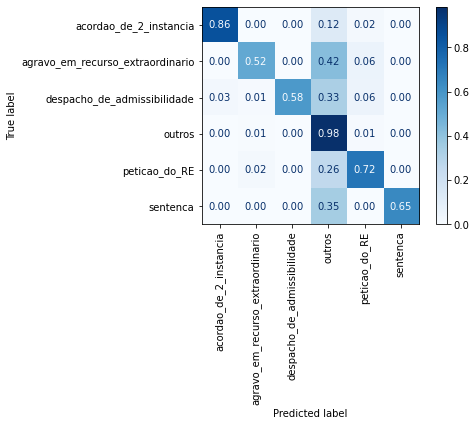

In [9]:
disp.plot(xticks_rotation="vertical", cmap="Blues", values_format=".2f")